### 1. Importing libraries and loading the dataset

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.simplefilter("ignore", UserWarning)

In [2]:
#reading the data
churn_data = pd.read_excel('Fitness Club Data V4.xlsx')

In [3]:
churn_data.shape

(24843, 9)

In [4]:
churn_data.head()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default
0,20190101,1830.2340,210.0000,6.0,CreditCard,1,0,0,0
1,20190101,1296.6660,1296.6660,6.0,Cash,0,0,0,0
2,20190101,930.4428,105.0000,5.0,Cash,0,0,0,0
3,20190102,798.3696,199.5924,9.0,DirectDebit,0,0,1,0
4,20190103,1206.2400,210.0000,9.0,Cheque,0,0,0,0


In [5]:
#understanding the data types and table structure
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24843 entries, 0 to 24842
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   enrolldt  24843 non-null  int64  
 1   price     24843 non-null  float64
 2   downpmt   24843 non-null  float64
 3   monthdue  24843 non-null  float64
 4   pmttype   24843 non-null  object 
 5   use       24843 non-null  int64  
 6   age       24843 non-null  int64  
 7   gender    24843 non-null  int64  
 8   default   24843 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 1.7+ MB


In [6]:
#checking for null or missing values
churn_data.isnull().sum()

enrolldt    0
price       0
downpmt     0
monthdue    0
pmttype     0
use         0
age         0
gender      0
default     0
dtype: int64

In [7]:
#checking for duplicates
churn_data.duplicated().sum()

28

In [8]:
#there are 28 duplicate rows and hence we remove them
churn_data.drop_duplicates(inplace = True)
churn_data.duplicated().sum()

0

#### Data Understanding

Numerical features :

    price
    downpmt
    monthdue
    age

Categorical features :

    enrolldt
    pmttype
    use
    gender
    default

### 2. Descriptive statistics

In [9]:
#for numerical features
churn_data[['price', 'downpmt', 'monthdue', 'age']].describe()

,price,downpmt,monthdue,age
count,24815.000000,24815.000000,24815.000000,24815.000000
mean,843.716047,167.825877,8.287717,29.231231
std,368.369657,281.634654,7.092833,13.256534
min,0.000000,0.000000,0.000000,0.000000
25%,587.160000,40.740000,5.500000,23.000000
50%,839.160000,84.000000,6.000000,28.000000
75%,1049.160000,147.000000,9.000000,36.000000
max,7871.850000,7871.850000,120.000000,99.000000


In [10]:
#adding descriptive columns for readability

churn_data["gender_desc"] = np.where(churn_data["gender"] == 1, "Female", "Male")
churn_data["churn"] = np.where(churn_data["default"] == 1, "Churn", "No Churn")

churn_data[['pmttype', 'use', 'gender_desc', 'churn']].describe(include='all')

,pmttype,use,gender_desc,churn
count,24815,24815.000000,24815,24815
unique,4,NaN,2,2
top,Cash,NaN,Female,No Churn
freq,7743,NaN,12452,21958
mean,NaN,1.945839,NaN,NaN
std,NaN,2.315952,NaN,NaN
min,NaN,0.000000,NaN,NaN
25%,NaN,0.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN
75%,NaN,3.000000,NaN,NaN


In [11]:
#for understanding categorical features
churn_data['use'].value_counts()

0    9900
1    5769
6    2461
3    2385
4    1483
5    1124
7     792
2     618
8     283
Name: use, dtype: int64

In [12]:
churn_data['gender_desc'].value_counts()

Female    12452
Male      12363
Name: gender_desc, dtype: int64

In [13]:
churn_data['pmttype'].value_counts()

Cash           7743
CreditCard     6035
DirectDebit    5899
Cheque         5138
Name: pmttype, dtype: int64

In [14]:
churn_data['use'].value_counts()

0    9900
1    5769
6    2461
3    2385
4    1483
5    1124
7     792
2     618
8     283
Name: use, dtype: int64

In [15]:
churn_data['churn'].value_counts()

No Churn    21958
Churn        2857
Name: churn, dtype: int64

### 3. Visualisation

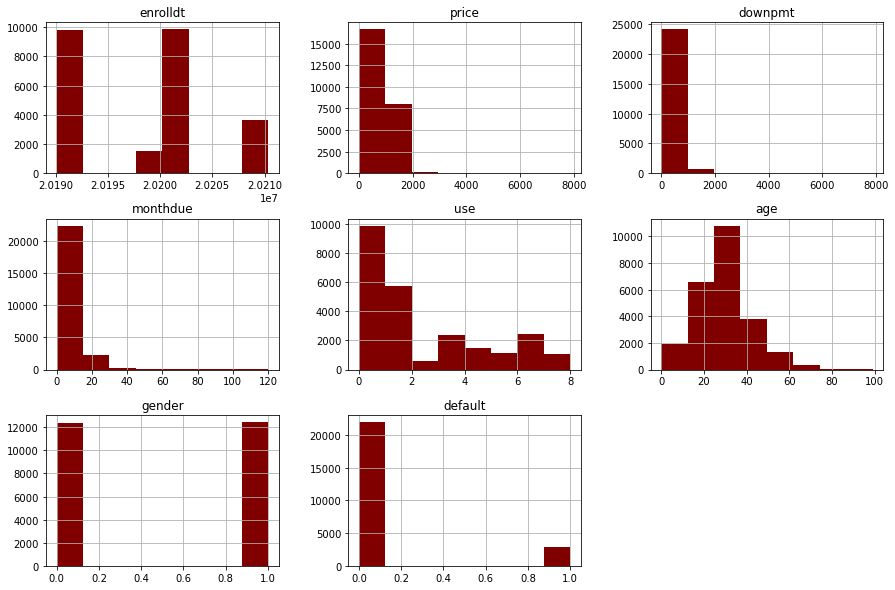

In [16]:
#Plotting histograms to visualize the data
churn_data.hist(bins=8, figsize=[15,10],color="maroon")
plt.show()

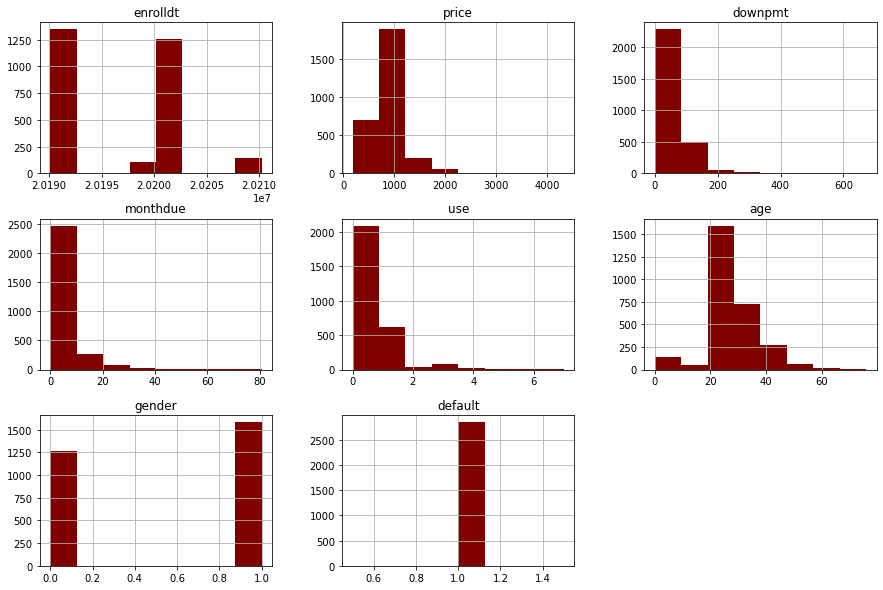

In [17]:
#histogram for customers who have churned
churn_data[churn_data.default==1].hist(bins=8, figsize=[15,10],color="maroon")
plt.show()

<b>Comparing the two sets of histograms and studying the shift in patterns, we can identify that </b>

1. Female customers are more likely to churn
2. Customers putting in lower downpayment are more highly likely to churn
3. We have to focus on retaining customers between the ages of 20 to 40
4. Customers who visit the gym less frequently should be encouraged to work out more often in order to retain them

In [18]:
#finding the correlation
churn_data.corr()

,enrolldt,price,downpmt,monthdue,use,age,gender,default
enrolldt,1.000000,0.194471,-0.097325,0.039942,0.182243,-0.080336,0.001567,-0.091687
price,0.194471,1.000000,0.277302,-0.137453,-0.060317,-0.101464,-0.015329,0.038672
downpmt,-0.097325,0.277302,1.000000,-0.035499,0.006492,0.000668,0.005611,-0.154977
monthdue,0.039942,-0.137453,-0.035499,1.000000,0.022808,0.002375,0.001602,-0.030100
use,0.182243,-0.060317,0.006492,0.022808,1.000000,0.059366,0.099929,-0.244684
age,-0.080336,-0.101464,0.000668,0.002375,0.059366,1.000000,0.022226,-0.056513
gender,0.001567,-0.015329,0.005611,0.001602,0.099929,0.022226,1.000000,0.038477
default,-0.091687,0.038672,-0.154977,-0.030100,-0.244684,-0.056513,0.038477,1.000000


<AxesSubplot:>

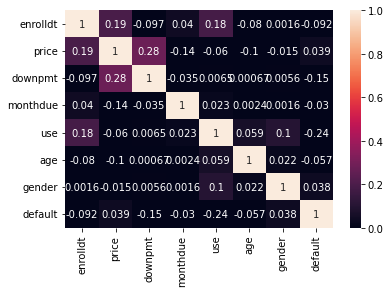

In [19]:
#visulaize the correlation using heatmap
sns.heatmap(churn_data.corr(),annot=True, vmin=0, vmax=1)


### 4. Data Pre-processing

In [20]:
#from the descriptive statistics of age (min and max) we can notice that age data needs to be cleaned
churn_data = churn_data[(churn_data.age >16 ) & (churn_data.age < 80)]

In [21]:
#convert enrolldt datatype 
churn_data['enrolldt'] = churn_data['enrolldt'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [22]:
churn_data.head()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default,gender_desc,churn
2241,2019-01-06,1827.0000,336.0000,5.50,Cheque,0,17,0,0,Male,No Churn
2242,2019-01-19,462.8820,385.5852,28.89,Cash,6,17,0,0,Male,No Churn
2243,2019-01-27,1544.0796,84.0000,5.86,Cash,0,17,0,1,Male,Churn
2244,2019-01-30,1827.0000,1827.0000,6.00,Cash,0,17,1,0,Female,No Churn
2245,2019-02-08,1230.1296,1230.1296,11.00,Cash,0,17,1,0,Female,No Churn


In [23]:
#grouping by year and month
churn_data.groupby([(churn_data.enrolldt.dt.year),(churn_data.enrolldt.dt.month)])['enrolldt'].agg(['count'])

count
enrolldt enrolldt       
2019     1           885
         2           659
         3           701
         4           610
         5           668
         6           651
         7           894
         8           927
         9           802
         10          683
         11          720
         12          843
2020     1           938
         2           747
         3           861
         4           734
         5           760
         6           748
         7           969
         8          1083
         9           835
         10          795
         11          795
         12          909
2021     1          1192
         2          1055
         3          1115

In [24]:
#finding payment type by year
churn_data.groupby([(churn_data.enrolldt.dt.year),churn_data.pmttype])['enrolldt'].agg(['count'])

count
enrolldt pmttype           
2019     Cash          4749
         Cheque         633
         CreditCard    2141
         DirectDebit   1520
2020     Cash          2140
         Cheque        2681
         CreditCard    2592
         DirectDebit   2761
2021     Cheque        1393
         CreditCard     813
         DirectDebit   1156

We can see that 2021 has only data for 3 months and the payment type Cash is not present. In order to provide complete information from 2 whole years 2019 and 2020, we can keep aside the 2021 data






In [25]:
churn_data_new = churn_data[churn_data.enrolldt.dt.year!=2021].reset_index()

In [26]:
#picking relevant columns for the model input
churn_data_new = churn_data_new[['price', 'downpmt', 'monthdue', 'pmttype', 'use', 'age',
       'gender', 'default']]

In [27]:
#convert categorical data into dummy or indicator variables for payment type column and the frequency of use columns 
churn_data_new = pd.get_dummies(churn_data_new, columns = ['pmttype', 'use'], prefix = ['pmttype', 'use'])

In [28]:
churn_data_new.head()

,price,downpmt,monthdue,age,gender,default,pmttype_Cash,pmttype_Cheque,pmttype_CreditCard,pmttype_DirectDebit,use_0,use_1,use_2,use_3,use_4,use_5,use_6,use_7,use_8
0,1827.0000,336.0000,5.50,17,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,462.8820,385.5852,28.89,17,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1544.0796,84.0000,5.86,17,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
3,1827.0000,1827.0000,6.00,17,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,1230.1296,1230.1296,11.00,17,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [29]:
churn_data_new.columns

Index(['price', 'downpmt', 'monthdue', 'age', 'gender', 'default',
       'pmttype_Cash', 'pmttype_Cheque', 'pmttype_CreditCard',
       'pmttype_DirectDebit', 'use_0', 'use_1', 'use_2', 'use_3', 'use_4',
       'use_5', 'use_6', 'use_7', 'use_8'],
      dtype='object')

### 5. Model Building

#### Logistic Regression

In [30]:
#splitting the features (X) and target (y) variable
y = churn_data_new['default']

X = churn_data_new.drop('default', axis = 1)

In [31]:
#making the train-test split on the data with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [32]:
#creating the logistic regression model for classification
log_reg = LogisticRegression()

#fitting the model with the train data
log_reg.fit(X_train, y_train)

#predicting the values for X_test
y_pred = log_reg.predict(X_test)

### 6. Visualising the outcomes of the prediction and results of the classification model

#### a. Confusion matrix

Confusion matrix is a method used to summarize classification algorithm on set of test data for which the true values are previously known. Sometimes it also refers as error matrix. It gives us the following information.

True positive [0,0] : TP means model predicted yes and correct answer for that is also yes

True negative [1,1] : TN means model predicted no and correct answer for that is also no

False positive [0,1] : FP means model predicted yes but actual answer is no

False negative [1,0] : FN means model predicted no but actual answer is yes

In [33]:
print("The confusion matrix is : \n", confusion_matrix(y_test, y_pred))


The confusion matrix is : 
 [[3182  148]
 [ 272  242]]


From the confusion matrix we can understand that we have 3182 True Positives and 242 True Negatives. To interpret the model performance from the confusion matrix we can compute Accuracy as follows : 

<b>Accuracy = ( TP + TN  /Total ) </b>

In [34]:
accuracy = (confusion_matrix(y_test, y_pred)[0][0] + confusion_matrix(y_test, y_pred)[1][1]) / (confusion_matrix(y_test, y_pred)[0][0] + confusion_matrix(y_test, y_pred)[1][1] + 
 confusion_matrix(y_test, y_pred)[0][1] + confusion_matrix(y_test, y_pred)[1][0] ) *100

print("Accuracy of the Logistic Regression is : " + str(round(accuracy,2)) + "%")

Accuracy of the Logistic Regression is : 89.07%


#### b. Classification report

A Classification report is used to measure the quality of predictions from a classification algorithm. It gives us the precision, recall, f1-score and support metrics which are explained below

Precision - Accuracy of positive predictions : TP/(TP + FP)

Recall - Percent of the positive cases identified correctly : TP/(TP+FN)

F-1 score - 2*(Recall * Precision) / (Recall + Precision)


In [35]:
print("The Classification report is : \n", classification_report(y_test, y_pred))

The Classification report is : 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      3330
           1       0.62      0.47      0.54       514

    accuracy                           0.89      3844
   macro avg       0.77      0.71      0.74      3844
weighted avg       0.88      0.89      0.88      3844



The F1 score is a weighted harmonic mean of precision and recall. Generally, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, <b>the weighted average of F1 should be used to compare classifier models, not global accuracy.</b>

Hence we can identify from the Classification report that model accuracy is <b>88%</b>

#### c. ROC curve (Receiver Operating Characteristic)

ROC- Receiver operating characteristic curve will help to summarize model’s performance by calculating trade-offs between TP rate and FN rate and it will plot these 2 parameters. To classify this term AUC (Area under the curve) is introduced which gives summary of ROC curve.

The higher the AUC, the better the performance of classifier. 
We can interpret the AUC values as follows :

1) If AUC =0 then classifier is predicting all the positive as negative and negative as positive.

2) If 0.5< AUC < 1 means classifier will distinguish the positive class value from negative class value because it is finding more number of TP and TN compared to FP and FN.

3) If AUC = 0.5 it means classifier is not able to distinguish between positive and negative values.

So we can conclude that higher the value of AUC better its ability to distinguish between positive and negative classes.

In [36]:
#creating a ROC curve
y_pred_prob = log_reg.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test, y_pred_prob)

auc = metrics.roc_auc_score (y_test, y_pred_prob)

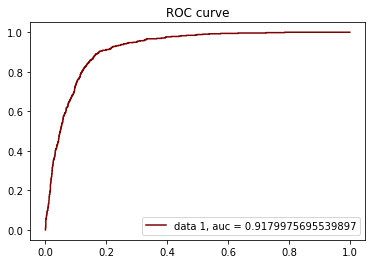

In [37]:
#plotting the results
plt.plot(fpr, tpr, label ="data 1, auc = "+str(auc), color = 'maroon')
plt.legend(loc=4)
plt.title('ROC curve')
plt.show()

The ROC curve has <b>Area Under the Curve = 91.79%</b> since the auc value falls between 0.5 and 1 we can determine that we have built a good model

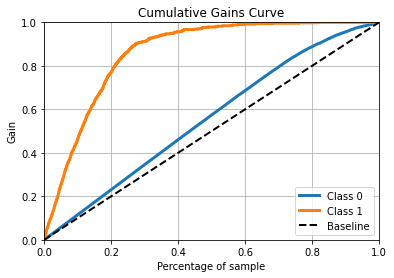

In [38]:
#using gains chart for model evaluation
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y_test, log_reg.predict_proba(X_test))
plt.show()

### 7. Feature Selection

In [39]:
#identifying the best features of the model
feature = log_reg.coef_
coef_table = pd.DataFrame({"feature_names":X_train.columns,"Beta":feature[0], "AbsBeta":abs(feature[0])})

coef_table = coef_table.sort_values(by='AbsBeta', ascending = False)

print(coef_table)

          feature_names      Beta   AbsBeta
7    pmttype_CreditCard -2.121776  2.121776
5          pmttype_Cash  1.615269  1.615269
8   pmttype_DirectDebit -1.390854  1.390854
9                 use_0  1.376194  1.376194
6        pmttype_Cheque  1.020763  1.020763
15                use_6 -0.867267  0.867267
12                use_3 -0.469255  0.469255
13                use_4 -0.438113  0.438113
10                use_1  0.430838  0.430838
14                use_5 -0.412704  0.412704
16                use_7 -0.324749  0.324749
17                use_8 -0.108537  0.108537
11                use_2 -0.063007  0.063007
3                   age -0.052681  0.052681
2              monthdue -0.044038  0.044038
1               downpmt -0.015802  0.015802
0                 price  0.000937  0.000937
4                gender -0.000802  0.000802


As it is evident above, <b>payment type and frequency of use</b> are the most relevant features of this model and can be identified as the key drivers for the business. We could apply feature selection to reduce the number of features and revise our model.